In [24]:
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd
import pprint
import os
import json
import numpy as np
import multiprocessing
import time
from sklearn import metrics
import seaborn as sn
import xml.etree.ElementTree as ET

pp = pprint.PrettyPrinter(indent=4)

In [25]:
def list_to_freq_dict(word_tags_list):
    word_tags_dict_freq = {}
    
    for i in word_tags_list:
        freq = word_tags_dict_freq.get(i)
        
        if freq is None:
            word_tags_dict_freq[i] = 1
        else:
            freq = freq + 1
            word_tags_dict_freq[i] = freq

    return word_tags_dict_freq

In [26]:
def parse_data(file):
    tree = ET.parse(file)
    root = tree.getroot()
    word_tags = []
    words = []
    tags = []

    for w_tag in root.iter('w'):
        word = w_tag.text.replace(" ", "")
        tag = w_tag.attrib['c5']

        words.append(word)

        if '-' in tag:
            tag1 = tag[:3]
            tag2 = tag[4:]
            word_tag1 = word + '_' + tag1
            word_tag2 = word + '_' + tag2

            tags.append(tag1)
            word_tags.append(word_tag1)
            tags.append(tag2)
            word_tags.append(word_tag2)

        else:
            word_tag = word + '_' + tag
            tags.append(tag)
            word_tags.append(word_tag)
    
    for mw_tag in root.iter('mw'):
        tag = mw_tag.attrib['c5']
        word = ""
        for w_tag in mw_tag.iterfind('w'):     
            word += w_tag.text.replace(" ", "")
        
        words.append(word)

        if '-' in tag:
            tag1 = tag[:3]
            tag2 = tag[4:]
            word_tag1 = word + '_' + tag1
            word_tag2 = word + '_' + tag2

            tags.append(tag1)
            word_tags.append(word_tag1)
            tags.append(tag2)
            word_tags.append(word_tag2)

        else:
            word_tag = word + '_' + tag
            tags.append(tag)
            word_tags.append(word_tag)
            
    for c_tag in root.iter('c'):
        tag = c_tag.attrib['c5']
        word = c_tag.text.replace(" ", "")
        
        words.append(word)
        
        word_tag = word + '_' + tag
        tags.append(tag)
        word_tags.append(word_tag) 

    return (words, tags, word_tags)

In [27]:
def parse_data_test(file):
    tree = ET.parse(file)
    root = tree.getroot()
    all_tuples = []
    
    for w_tag in root.iter('w'):
        word = w_tag.text.replace(" ", "")
        tag = w_tag.attrib['c5']

        all_tuples.append((word, tag))

    for mw_tag in root.iter('mw'):
        tag = mw_tag.attrib['c5']
        word = ""
        for w_tag in mw_tag.iterfind('w'):     
            word += w_tag.text.replace(" ", "")
        
        all_tuples.append((word, tag))
    
    for c_tag in root.iter('c'):
        if c_tag.text is not None:
            tag = c_tag.attrib['c5']
            word = c_tag.text.replace(" ", "")
        
            all_tuples.append((word, tag))

    return all_tuples

In [31]:
def load_dataset(path, training=True):

    if training == True:
        word_list = []
        tag_list = []
        word_tags_list = []
        
        for subdir, dirs, files in os.walk(path):
            for file in files:

                fileName = subdir + '/' + str(file)
                words, tags, word_tags = parse_data(fileName)

                word_list.extend(words)
                tag_list.extend(tags)
                word_tags_list.extend(word_tags)
            
        return word_list, tag_list, word_tags_list
        
    else:
        all_tuples = []
        
        for subdir, dirs, files in os.walk(path):
            for file in files:

                fileName = subdir + '/' + str(file)
                tuples = parse_data_test(fileName)
                all_tuples.extend(tuples)

        return all_tuples

In [32]:
# Load Dataset

train_path = 'Train-corpus/'
test_path = 'Test-corpus/'
#
word_list, tag_list, word_tags_list = load_dataset(train_path)
# test_tuples = load_dataset(test_path, training=False)

In [35]:
# Generate Frequency Dict for words

word_dict = list_to_freq_dict(word_list)

with open('words.json', 'w') as outfile:
    json.dump(word_dict, outfile, indent=4)

In [36]:
# Print top 10 words

k1 = Counter(word_dict)
top_words = k1.most_common(10)
print('Top 10 Words are: ')
for i in top_words:
    print(i[0], " :", i[1], " ")

Top 10 Words are: 
the  : 525421  
,  : 484602  
.  : 420804  
of  : 285406  
to  : 240618  
and  : 234301  
a  : 198729  
in  : 171346  
is  : 91155  
that  : 86423  


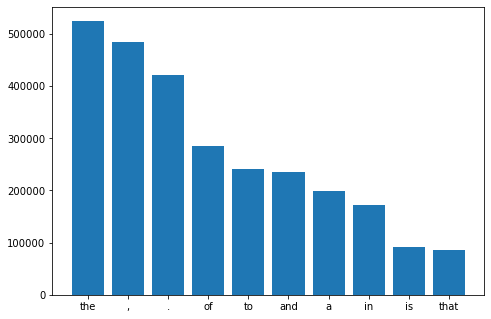

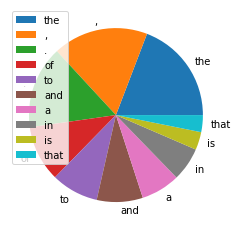

In [37]:
# Plot Top 10 Words

keys, values = [i[0] for i in top_words], [i[1] for i in top_words]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(keys,values)
plt.show()

patches, texts = plt.pie(values, labels=keys)
plt.legend(patches, keys, loc="best")
plt.savefig('words_chart.png')
plt.show()

In [38]:
# Generate Frequency Dict for tags

tag_dict = list_to_freq_dict(tag_list)
with open('tags.json', 'w') as outfile:
    json.dump(tag_dict, outfile, indent=4)

In [39]:
# Print Top 10 Tags

k1 = Counter(tag_dict)
top_tags = k1.most_common(10)
print('Top 10 Tags are: ')
for i in top_tags:
    print(i[0], " :", i[1], " ")

Top 10 Tags are: 
NN1  : 1574536  
PUN  : 1014364  
AT0  : 848311  
PRP  : 835309  
AJ0  : 748904  
NN2  : 524765  
NP0  : 505272  
AV0  : 446396  
PNP  : 360704  
CJC  : 317635  


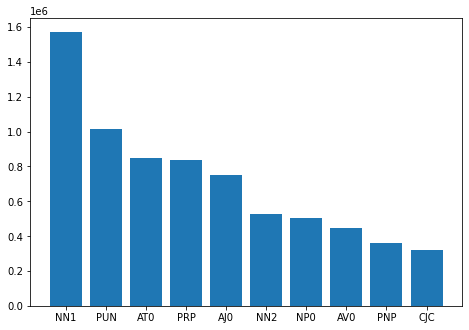

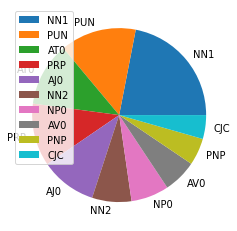

In [40]:
# Plot Top 10 Tags

keys, values = [i[0] for i in top_tags], [i[1] for i in top_tags]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(keys,values)
plt.show()

patches, texts = plt.pie(values, labels=keys)
plt.legend(patches, keys, loc="best")
plt.savefig('tags_chart.png')
plt.show()

In [41]:
# Generate Frequency Dict for word_tags

word_tags_dict = list_to_freq_dict(word_tags_list)
with open('word_tags.json', 'w') as outfile:
    json.dump(word_tags_dict, outfile, indent=4)

In [3]:
# Load JSON Files

with open('words.json') as f:
    word_dict = json.load(f)
with open('tags.json') as f:
    tag_dict = json.load(f)
with open('word_tags.json') as f:
    word_tags_dict = json.load(f)

In [9]:
print(len(tag_dict))
print(len(word_dict))
print(len(word_tags_dict))

61
193511
253488


In [10]:
# Use Laplace Smoothing
def probability_word_given_tag(word, tag):
    
    count_tag = tag_dict[tag]
    
    if word+'_'+tag in word_tags_dict.keys():
        count_word_tag = word_tags_dict[word+'_'+tag]

        return (count_word_tag)/(count_tag)
    
    else:
        return 1/(count_tag + 1)

In [11]:
print(probability_word_given_tag('a','AT0'))

0.23395311389337164


In [12]:
def best_tag_for_word(word):
    max_prob = 0
    most_prob_tag = 'none'
    for tag in tag_dict.keys():
        p_word_tag = probability_word_given_tag(word,tag)
        p_tag = tag_dict[tag]
        
        p_tag_word = (p_word_tag*p_tag)
        
        if max_prob < p_tag_word:
            max_prob = p_tag_word
            most_prob_tag = tag
    
    return most_prob_tag

In [13]:
def create_model():
    model = {}
    for word in word_dict.keys():
        model[word] = best_tag_for_word(word)
    return model

In [14]:
model = create_model()

In [23]:
print(model["communities"])

NN2


In [16]:
print(len(test_tuples))

4159247


In [17]:
def check_prediction(word_tuple):
    
    word, label = word_tuple
    logit = best_tag_for_word(word)
    if logit in label:
        return True
    else:
        return False

In [20]:
def get_model_accuracy(test_tuples):
    
    correct = 0
    incorrect = 0
    
    err = 0
    
    print("Total: %d" % len(test_tuples))
    
    t0 = time.process_time()
    
    for i in range(0,len(test_tuples)):
        
        word, label = test_tuples[i]
        
        if word in model.keys():
            if model[word] in label:
                correct = correct + 1
            else:
                
                incorrect = incorrect + 1
        
        else:
            err = err + 1
            if best_tag_for_word(word) in label:
                correct = correct + 1
            else:
                incorrect = incorrect + 1
                
        
    print("Evaluated: %d " % (incorrect + correct))    
    print("Time Taken: %.2f \n " % (time.process_time()-t0))
    print("Correct: %d " % (correct))   
    print("Incorrect: %d " % (incorrect))  
    
    print("Final Accuracy = %.06f"  % (correct/(correct+incorrect)))
    print("Errors: %d " % err)

In [21]:
get_model_accuracy(test_tuples)

Total: 4159247
Evaluated: 4159247 
Time Taken: 2.80 
 
Correct: 3840459 
Incorrect: 318788 
Final Accuracy = 0.923354
Errors: 65512 


In [37]:
tags = list(tag_dict.keys())
def get_confusion_matrix(test_tuples):
    y_true = []
    y_pred = []
    for i in range(0,len(test_tuples)):
        word, label = test_tuples[i]
        y_true.append(label)
        if word in model.keys():
            y_pred.append(model[word])
        else:
            y_pred.append(best_tag_for_word(word))
    plt.figure(figsize=(25, 22), dpi=10)
    df_cm = pd.DataFrame(metrics.confusion_matrix(y_true, y_pred, tags), tag_dict.keys(), tag_dict.keys())
    sn.set(font_scale=1.0)
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 5}) # font size
    # plt.show()
    # plt.savefig('confusion_matrix.png')
    plt.savefig('cm.png', format='png', dpi=200)
    # print(metrics.confusion_matrix(y_true, y_pred))

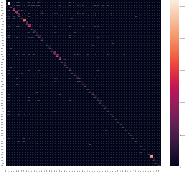

In [38]:
get_confusion_matrix(test_tuples)